# **How Poverty and International Trade Impact Global Carbon Footprint**


### Data sources:
### 1) [https://www.kaggle.com/footprintnetwork/ecological-footprint](http://)
### 2) [https://www.kaggle.com/ophi/mpi](http://)
### 3) [https://www.kaggle.com/unitednations/global-commodity-trade-statistics](http://)


In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#  source: http://www.un.org/en/development/desa/policy/wesp/wesp_current/2014wesp_country_classification.pdf
developed_countries = ["Austria", "Belgium", "Denmark", "France", "Germany", "Greece", "Ireland", 
              "Italy", "Luxembourg", "Netherlands", "Portugal", "Spain", "Sweden", "United Kingdom",
              "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Estonia", "Hungary", "Latvia", "Lithuania",
              "Malta", "Poland", "Romania", "Slovakia", "Slovenia", "Iceland", "Norway", "Switzerland",
              "Australia", "Canada", "Japan", "New Zealand", "USA","Canada", "Japan", "France", "Germany"]
# import os
# print(os.listdir("../input/carbon-regression"))

# Any results you write to the current directory are saved as output.

In [7]:
countries = pd.read_csv("../input/mpi/MPI_national.csv")
print(countries.shape)
countries.head()


(102, 8)


,ISO,Country,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural
0,KAZ,Kazakhstan,0.000,0.0,33.3,0.000,0.09,33.3
1,SRB,Serbia,0.000,0.1,41.4,0.002,0.50,40.3
2,KGZ,Kyrgyzstan,0.000,0.1,40.2,0.003,0.70,37.1
3,TUN,Tunisia,0.000,0.1,35.6,0.012,3.18,38.7
4,ARM,Armenia,0.001,0.2,33.3,0.001,0.39,36.9


In [8]:
footprint = pd.read_csv("../input/ecological-footprint/countries.csv")
print(footprint.shape)
footprint.head()

(188, 21)


,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.82,0.46,$614.66,0.30,0.20,0.08,0.18,0.00,0.79,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.60,6
1,Albania,Northern/Eastern Europe,3.16,0.73,"$4,534.37",0.78,0.22,0.25,0.87,0.02,2.21,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.87,6
2,Algeria,Africa,38.48,0.73,"$5,430.57",0.60,0.16,0.17,1.14,0.01,2.12,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.61,5
3,Angola,Africa,20.82,0.52,"$4,665.91",0.33,0.15,0.12,0.20,0.09,0.93,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.37,6
4,Antigua and Barbuda,Latin America,0.09,0.78,"$13,205.10",NaN,NaN,NaN,NaN,NaN,5.38,NaN,NaN,NaN,NaN,NaN,0.94,-4.44,3.11,5.70,2


In [9]:
trade = pd.read_csv("../input/global-commodity-trade-statistics/commodity_trade_statistics_data.csv")
trade = trade.rename(columns={'country_or_area': 'Country'})
print(trade.shape)
trade.head()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



(8225871, 10)


,Country,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,Afghanistan,2016,10410,"Sheep, live",Export,6088,2339.0,Number of items,51.0,01_live_animals
1,Afghanistan,2016,10420,"Goats, live",Export,3958,984.0,Number of items,53.0,01_live_animals
2,Afghanistan,2008,10210,"Bovine animals, live pure-bred breeding",Import,1026804,272.0,Number of items,3769.0,01_live_animals
3,Albania,2016,10290,"Bovine animals, live, except pure-bred breeding",Import,2414533,1114023.0,Number of items,6853.0,01_live_animals
4,Albania,2016,10392,"Swine, live except pure-bred breeding > 50 kg",Import,14265937,9484953.0,Number of items,96040.0,01_live_animals


In [10]:
# recode levels
def recode(levels):
    if levels == 'Re-Export':
        return 'Export'
    else:
        return levels

trade['flow'] = trade['flow'].apply(recode)
country_trade = trade.groupby(["Country","flow"])["trade_usd"].sum().reset_index()
print(country_trade['flow'].value_counts())
# just query the exports leave out the imports
country_exptrade = country_trade.loc[(country_trade['flow'] == 'Export')].reset_index()
country_exptrade.head()

Import       208
Export       206
Re-Import    102
Name: flow, dtype: int64


,index,Country,flow,trade_usd
0,0,Afghanistan,Export,8780222349
1,2,Albania,Export,47544871187
2,5,Algeria,Export,1764159930121
3,8,Andorra,Export,3644090536
4,11,Angola,Export,868304901687


> # **Merge Data**

In [11]:
def recode_country(countries):
    if countries == 'Bolivia, Plurinational State of':
        return 'Bolivia'
    elif countries == 'Bolivia (Plurinational State of)':
        return 'Bolivia'
    elif countries == 'Bosnia and Herzegovina':
        return 'Bosnia Herzegovina'
    elif countries == 'Central African Rep.':
        return 'Central African Republic'
    elif countries == 'Congo, Democratic Republic of the':
        return 'Congo'
    elif countries == 'Congo, Republic of':
        return 'Congo'
    elif countries == 'Congo, Democratic Republic of':
        return 'Congo'
    elif countries == "Côte d'Ivoire":
        return 'CotedeIvoire'
    elif countries == "Cote d'Ivoire":
        return 'CotedeIvoire'
    elif countries == "Dominican Rep.":
        return "Dominican Republic"
    elif countries == "Fmr Fed. Rep. of Germany":
        return 'Germany'
    elif countries == "Korea, Democratic People's Republic of":
        return 'Korea, Republic of'
    elif countries == "Rep. of Korea":
        return 'Korea, Republic of'
    elif countries == "Lao People's Dem. Rep.":
        return "Lao People's Democratic Republic"
    elif countries == 'Macedonia, The former Yugoslav Republic of':
        return 'Macedonia'
    elif countries == "Macedonia TFYR":
        return 'Macedonia'
    elif countries == "TFYR of Macedonia":
        return 'Macedonia'
    elif countries == 'Moldova, Republic of':
        return 'Moldova'
    elif countries == 'Rep. of Moldova':
        return 'Moldova'
    elif countries == "Palestine, State ofa":
        return 'State of Palestine'
    elif countries == 'Solomon Islands':
        return 'Solomon Isds'
    elif countries == 'Iran, Islamic Republic of':
        return 'Iran'
    elif countries == 'Saint Vincent and the Grenadines':
        return 'Saint Vincent and Grenadines'
    elif countries == 'So. African Customs Union':
        return 'South Africa'
    elif countries == "Fmr Sudan":
        return 'Sudan'
    elif countries == 'Venezuela, Bolivarian Republic of':
        return 'Venezuela'
    elif countries == 'United Rep. of Tanzania':
        return 'Tanzania, United Republic of'
    elif countries == "United States":
        return 'USA'
    elif countries == "United States of America":
        return 'USA'
    else:
        return countries

countries['Country'] = countries['Country'].apply(recode_country)
footprint['Country'] = footprint['Country'].apply(recode_country)
country_exptrade['Country'] = country_exptrade['Country'].apply(recode_country)

In [12]:
MERGE = footprint.merge(countries, how="outer", on="Country")
print(MERGE.shape)
MERGE

(196, 28)


,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality,ISO,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural
0,Afghanistan,Middle East/Central Asia,29.820,0.460000,$614.66,0.30,0.20,0.08,0.18,0.00,0.79,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.600000,6,AFG,0.132,28.8,45.8,0.347,64.66,53.6
1,Albania,Northern/Eastern Europe,3.160,0.730000,"$4,534.37",0.78,0.22,0.25,0.87,0.02,2.21,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.870000,6,ALB,0.003,0.8,37.7,0.007,1.87,37.7
2,Algeria,Africa,38.480,0.730000,"$5,430.57",0.60,0.16,0.17,1.14,0.01,2.12,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.610000,5,DZA,0.003,0.7,36.9,0.011,2.70,40.0
3,Angola,Africa,20.820,0.520000,"$4,665.91",0.33,0.15,0.12,0.20,0.09,0.93,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.370000,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Antigua and Barbuda,Latin America,0.090,0.780000,"$13,205.10",NaN,NaN,NaN,NaN,NaN,5.38,NaN,NaN,NaN,NaN,NaN,0.94,-4.44,3.11,5.700000,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Argentina,Latin America,41.090,0.830000,"$13,540.00",0.78,0.79,0.29,1.08,0.10,3.14,2.64,1.86,0.66,1.67,0.10,6.92,3.78,1.82,0.450000,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Armenia,Middle East/Central Asia,2.970,0.730000,"$3,426.39",0.74,0.18,0.34,0.89,0.01,2.23,0.44,0.26,0.10,0.02,0.07,0.89,-1.35,1.29,2.520000,3B,ARM,0.001,0.2,33.3,0.001,0.39,36.9
7,Aruba,Latin America,0.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.88,NaN,NaN,NaN,NaN,NaN,0.57,-11.31,6.86,20.690000,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Australia,Asia-Pacific,23.050,0.930000,"$66,604.20",2.68,0.63,0.89,4.85,0.11,9.31,5.42,5.81,2.01,3.19,0.14,16.57,7.26,5.37,0.560000,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Austria,European Union,8.460,0.880000,"$51,274.10",0.82,0.27,0.63,4.14,0.06,6.06,0.71,0.16,2.04,0.00,0.15,3.07,-3.00,3.50,1.980000,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
MERGE2 = MERGE.merge(country_exptrade, how="outer", on="Country")
MERGE2 = MERGE2.drop(columns=['index', 'flow'])
MERGE2 = MERGE2.sort_values(['Country'], ascending=[True])
print(MERGE2.shape)
MERGE2.head()

(223, 29)


,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality,ISO,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural,trade_usd
0,Afghanistan,Middle East/Central Asia,29.82,0.46,$614.66,0.30,0.20,0.08,0.18,0.00,0.79,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.60,6,AFG,0.132,28.8,45.8,0.347,64.66,53.6,8.780222e+09
1,Albania,Northern/Eastern Europe,3.16,0.73,"$4,534.37",0.78,0.22,0.25,0.87,0.02,2.21,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.87,6,ALB,0.003,0.8,37.7,0.007,1.87,37.7,4.754487e+10
2,Algeria,Africa,38.48,0.73,"$5,430.57",0.60,0.16,0.17,1.14,0.01,2.12,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.61,5,DZA,0.003,0.7,36.9,0.011,2.70,40.0,1.764160e+12
199,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.644091e+09
3,Angola,Africa,20.82,0.52,"$4,665.91",0.33,0.15,0.12,0.20,0.09,0.93,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.37,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.683049e+11


# **START ANALYSIS**

In [14]:
MERGE2 = MERGE2.reset_index()
MERGE2['ExpTrade_Mill'] = MERGE2['trade_usd']/1000000
FIRST_WORLD = MERGE2[MERGE2['Country'].isin(developed_countries)].reset_index()
developing = set(MERGE2["Country"]).difference(set(developed_countries))
DEVELOPING = MERGE2[MERGE2['Country'].isin(developing)].reset_index()

In [15]:
MERGE2['ExpTrade_Mill'] = MERGE2['trade_usd']/1000000
MERGE2.columns
MERGE2['Carbon Footprint'].describe()

count    177.000000
mean       1.798927
std        1.887528
min        0.000000
25%        0.420000
50%        1.140000
75%        2.600000
max       12.650000
Name: Carbon Footprint, dtype: float64

# **PLOTS**

#### NOTE: the size of the bubble represents Carbon Footprint

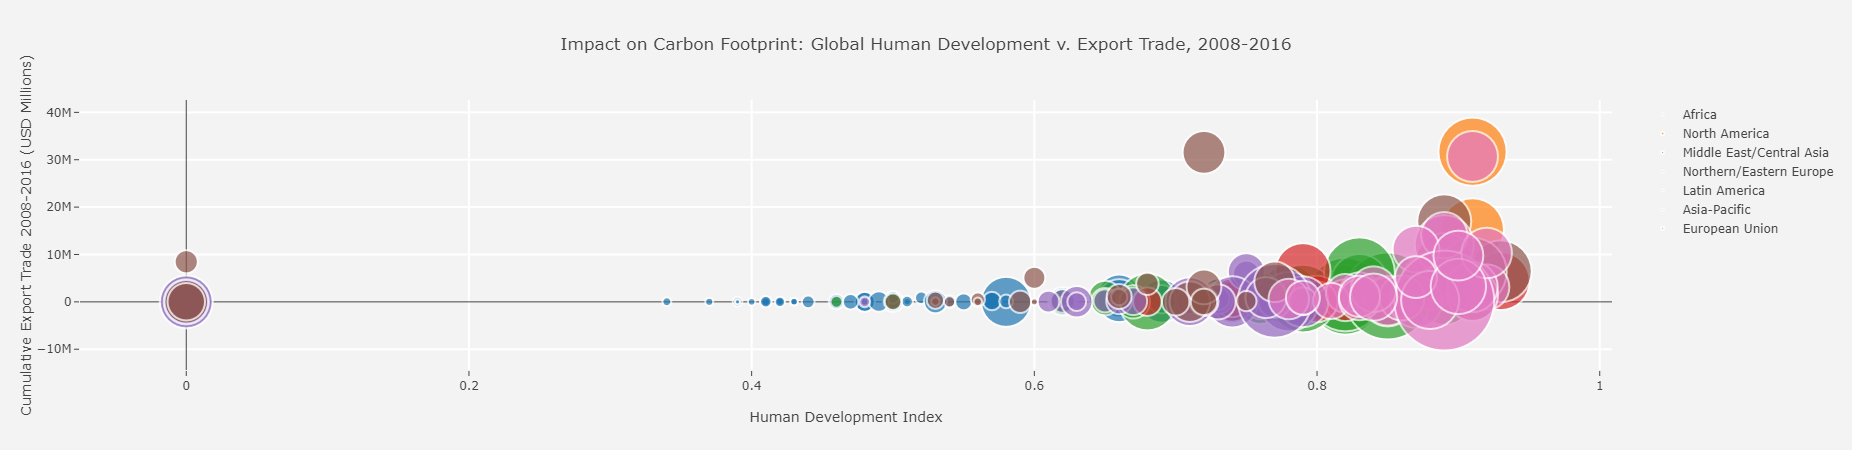

In [16]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import pandas as pd
import math

df_2007 = MERGE2
df_2007['HDI'].fillna(0, inplace=True)
df_2007['ExpTrade_Mill'].fillna(0, inplace=True)
df_2007['Total Ecological Footprint'].fillna(0, inplace=True)
df_2007['GDP per Capita'].fillna(0, inplace=True)
df_2007["Population (millions)"].fillna(0, inplace=True)
df_2007["Carbon Footprint"].fillna(0, inplace=True)

#slope = 2.666051223553066e-05
hover_text = []
bubble_size = []

for index, row in df_2007.iterrows(): # each row of the df_2007 will be referenced
    hover_text.append(('Country: {country}<br>'+
                      'Total Ecological Footprint: {EcoFoot}<br>'+
                      'GDP per capita: {gdp}<br>'+
                      'Population (Millions): {pop}<br>'+
                      'Year: {year}').format(country=row['Country'],
                                            EcoFoot=row['Total Ecological Footprint'],
                                            gdp=row['GDP per Capita'],
                                            pop=row["Population (millions)"],
                                            year='2016'))
    #bubble_size.append(math.sqrt(row["Population (millions)"]*slope))
    bubble_size.append(row["Carbon Footprint"])

df_2007['text'] = hover_text
df_2007['size'] = bubble_size
sizeref = 2.*max(df_2007['size'])/(100**2)

trace0 = go.Scatter(
    x=df_2007['HDI'][df_2007['Region'] == 'Africa'],
    y=df_2007['ExpTrade_Mill'][df_2007['Region'] == 'Africa'],
    mode='markers',
    name='Africa',
    text=df_2007['text'][df_2007['Region'] == 'Africa'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'Africa'],
        line=dict(
            width=2
        ),
    )
)
trace1 = go.Scatter(
    x=df_2007['HDI'][df_2007['Region'] == 'North America'],
    y=df_2007['ExpTrade_Mill'][df_2007['Region'] == 'North America'],
    mode='markers',
    name='North America',
    text=df_2007['text'][df_2007['Region'] == 'North America'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'North America'],
        line=dict(
            width=2
        ),
    )
)
trace2 = go.Scatter(
    x=df_2007['HDI'][df_2007['Region'] == 'Middle East/Central Asia'],
    y=df_2007['ExpTrade_Mill'][df_2007['Region'] == 'Middle East/Central Asia'],
    mode='markers',
    name='Middle East/Central Asia',
    text=df_2007['text'][df_2007['Region'] == 'Middle East/Central Asia'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'Middle East/Central Asia'],
        line=dict(
            width=2
        ),
    )
)
trace3 = go.Scatter(
    x=df_2007['HDI'][df_2007['Region'] == 'Northern/Eastern Europe'],
    y=df_2007['ExpTrade_Mill'][df_2007['Region'] == 'Northern/Eastern Europe'],
    mode='markers',
    name='Northern/Eastern Europe',
    text=df_2007['text'][df_2007['Region'] == 'Northern/Eastern Europe'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'Northern/Eastern Europe'],
        line=dict(
            width=2
        ),
    )
)
trace4 = go.Scatter(
    x=df_2007['HDI'][df_2007['Region'] == 'Latin America'],
    y=df_2007['ExpTrade_Mill'][df_2007['Region'] == 'Latin America'],
    mode='markers',
    name='Latin America',
    text=df_2007['text'][df_2007['Region'] == 'Latin America'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'Latin America'],
        line=dict(
            width=2
        ),
    )
)

trace5 = go.Scatter(
    x=df_2007['HDI'][df_2007['Region'] == 'Asia-Pacific'],
    y=df_2007['ExpTrade_Mill'][df_2007['Region'] == 'Asia-Pacific'],
    mode='markers',
    name='Asia-Pacific',
    text=df_2007['text'][df_2007['Region'] == 'Asia-Pacific'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'Asia-Pacific'],
        line=dict(
            width=2
        ),
    )
)

trace6 = go.Scatter(
     x=df_2007['HDI'][df_2007['Region'] == 'European Union'],
    y=df_2007['ExpTrade_Mill'][df_2007['Region'] == 'European Union'],
    mode='markers',
    name='European Union',
    text=df_2007['text'][df_2007['Region'] == 'European Union'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'European Union'],
        line=dict(
            width=2
        ),
    )
)
                      
trace7 = go.Scatter(
    x=df_2007['HDI'][df_2007['Region'] == 'nan'],
    y=df_2007['ExpTrade_Mill'][df_2007['Region'] == 'nan'],
    mode='markers',
    name='nan',
    text=df_2007['text'][df_2007['Region'] == 'nan'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'nan'],
        line=dict(
            width=2
        ),
    )
)
                      
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]
layout = go.Layout(
    title='Impact on Carbon Footprint: Global Human Development v. Export Trade, 2008-2016',
    xaxis=dict(
        title='Human Development Index',
        gridcolor='rgb(255, 255, 255)',
        #range=[0, 1],
        #type='log',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Cumulative Export Trade 2008-2016 (USD Millions)',
        gridcolor='rgb(255, 255, 255)',
        #range=[36.12621671352166, 91.72921793264332],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig) 

***Let's start with African countries by filtering out all other regions***
* Carbon Footprint: bubbles are relatively small comparing to other regions, indicating that African countries are not the main contributors to carbon emissions
* HDI: African countries have relatively lower Human Development Index (HDI), however as HDI increases, the bubbles size increases, inferring that as quality of living and development increases, carbon footprint also increases
* Trade: most of the African countries don't trade as much (under 5MM), and interesting observation is that countries that have higher HDI trade more, indicating that there is a positive relationship between trade and HDI.

**Next contrasting with First-World Countries: EU and North America**
* Carbon Footprint: bubbles are relatively large comparing to Africa and other developing regions, indicating that First-world countries are the main contributors to carbon emissions.
* HDI: EU and NA countries have relatively higher HDI (> 0.8).
* Trade: most of the developed countries trade more.

# **Developing vs First World Countries**

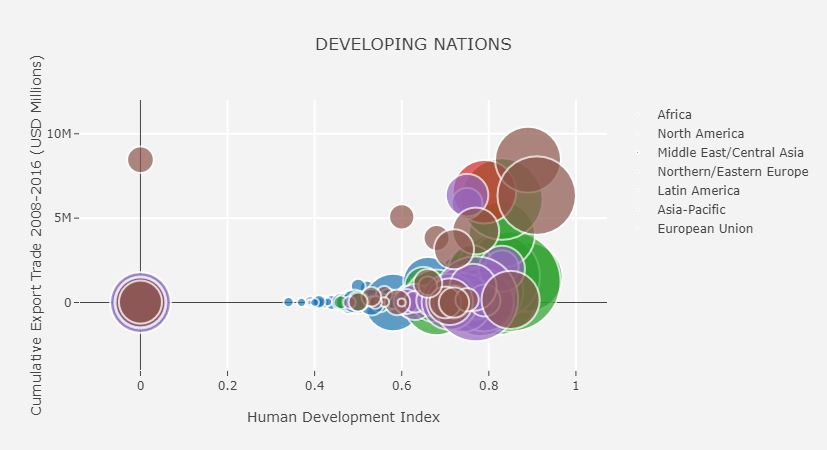

In [22]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import pandas as pd
import math

df_2007 = DEVELOPING
df_2007['HDI'].fillna(0, inplace=True)
df_2007['ExpTrade_Mill'].fillna(0, inplace=True)
df_2007['Total Ecological Footprint'].fillna(0, inplace=True)
df_2007['GDP per Capita'].fillna(0, inplace=True)
df_2007["Population (millions)"].fillna(0, inplace=True)
df_2007["Carbon Footprint"].fillna(0, inplace=True)

#slope = 2.666051223553066e-05
hover_text = []
bubble_size = []

for index, row in df_2007.iterrows(): # each row of the df_2007 will be referenced
    hover_text.append(('Country: {country}<br>'+
                      'Total Ecological Footprint: {EcoFoot}<br>'+
                      'GDP per capita: {gdp}<br>'+
                      'Population (Millions): {pop}<br>'+
                      'Year: {year}').format(country=row['Country'],
                                            EcoFoot=row['Total Ecological Footprint'],
                                            gdp=row['GDP per Capita'],
                                            pop=row["Population (millions)"],
                                            year='2016'))
    #bubble_size.append(math.sqrt(row["Population (millions)"]*slope))
    bubble_size.append(row["Carbon Footprint"])

df_2007['text'] = hover_text
df_2007['size'] = bubble_size
sizeref = 2.*max(df_2007['size'])/(100**2)

trace0 = go.Scatter(
    x=df_2007['HDI'][df_2007['Region'] == 'Africa'],
    y=df_2007['ExpTrade_Mill'][df_2007['Region'] == 'Africa'],
    mode='markers',
    name='Africa',
    text=df_2007['text'][df_2007['Region'] == 'Africa'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'Africa'],
        line=dict(
            width=2
        ),
    )
)
trace1 = go.Scatter(
    x=df_2007['HDI'][df_2007['Region'] == 'North America'],
    y=df_2007['ExpTrade_Mill'][df_2007['Region'] == 'North America'],
    mode='markers',
    name='North America',
    text=df_2007['text'][df_2007['Region'] == 'North America'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'North America'],
        line=dict(
            width=2
        ),
    )
)
trace2 = go.Scatter(
    x=df_2007['HDI'][df_2007['Region'] == 'Middle East/Central Asia'],
    y=df_2007['ExpTrade_Mill'][df_2007['Region'] == 'Middle East/Central Asia'],
    mode='markers',
    name='Middle East/Central Asia',
    text=df_2007['text'][df_2007['Region'] == 'Middle East/Central Asia'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'Middle East/Central Asia'],
        line=dict(
            width=2
        ),
    )
)
trace3 = go.Scatter(
    x=df_2007['HDI'][df_2007['Region'] == 'Northern/Eastern Europe'],
    y=df_2007['ExpTrade_Mill'][df_2007['Region'] == 'Northern/Eastern Europe'],
    mode='markers',
    name='Northern/Eastern Europe',
    text=df_2007['text'][df_2007['Region'] == 'Northern/Eastern Europe'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'Northern/Eastern Europe'],
        line=dict(
            width=2
        ),
    )
)
trace4 = go.Scatter(
    x=df_2007['HDI'][df_2007['Region'] == 'Latin America'],
    y=df_2007['ExpTrade_Mill'][df_2007['Region'] == 'Latin America'],
    mode='markers',
    name='Latin America',
    text=df_2007['text'][df_2007['Region'] == 'Latin America'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'Latin America'],
        line=dict(
            width=2
        ),
    )
)

trace5 = go.Scatter(
    x=df_2007['HDI'][df_2007['Region'] == 'Asia-Pacific'],
    y=df_2007['ExpTrade_Mill'][df_2007['Region'] == 'Asia-Pacific'],
    mode='markers',
    name='Asia-Pacific',
    text=df_2007['text'][df_2007['Region'] == 'Asia-Pacific'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'Asia-Pacific'],
        line=dict(
            width=2
        ),
    )
)

trace6 = go.Scatter(
     x=df_2007['HDI'][df_2007['Region'] == 'European Union'],
    y=df_2007['ExpTrade_Mill'][df_2007['Region'] == 'European Union'],
    mode='markers',
    name='European Union',
    text=df_2007['text'][df_2007['Region'] == 'European Union'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'European Union'],
        line=dict(
            width=2
        ),
    )
)
                      
trace7 = go.Scatter(
    x=df_2007['HDI'][df_2007['Region'] == 'nan'],
    y=df_2007['ExpTrade_Mill'][df_2007['Region'] == 'nan'],
    mode='markers',
    name='nan',
    text=df_2007['text'][df_2007['Region'] == 'nan'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'nan'],
        line=dict(
            width=2
        ),
    )
)
                      
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]
layout = go.Layout(
    title='DEVELOPING NATIONS',
    xaxis=dict(
        title='Human Development Index',
        gridcolor='rgb(255, 255, 255)',
        #range=[0, 1],
        #type='log',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Cumulative Export Trade 2008-2016 (USD Millions)',
        gridcolor='rgb(255, 255, 255)',
        range=[-4000000, 12000000],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig) 

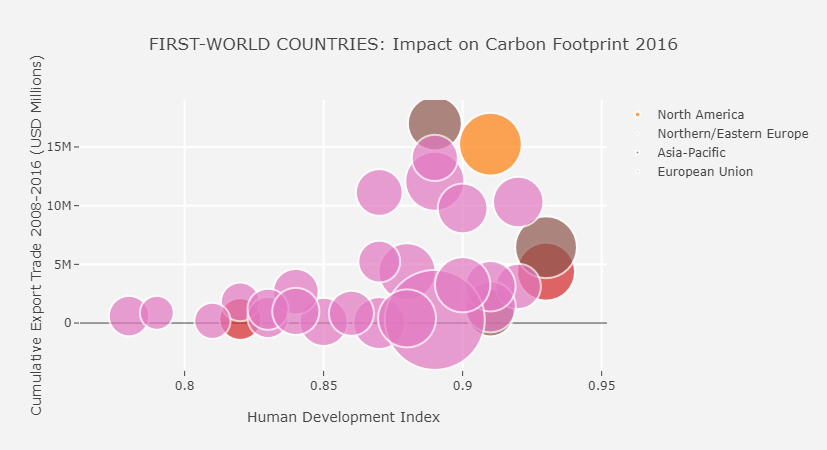

In [21]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import pandas as pd
import math

df_2007 = FIRST_WORLD
df_2007['HDI'].fillna(0, inplace=True)
df_2007['ExpTrade_Mill'].fillna(0, inplace=True)
df_2007['Total Ecological Footprint'].fillna(0, inplace=True)
df_2007['GDP per Capita'].fillna(0, inplace=True)
df_2007["Population (millions)"].fillna(0, inplace=True)
df_2007["Carbon Footprint"].fillna(0, inplace=True)

#slope = 2.666051223553066e-05
hover_text = []
bubble_size = []

for index, row in df_2007.iterrows(): # each row of the df_2007 will be referenced
    hover_text.append(('Country: {country}<br>'+
                      'Total Ecological Footprint: {EcoFoot}<br>'+
                      'GDP per capita: {gdp}<br>'+
                      'Population (Millions): {pop}<br>'+
                      'Year: {year}').format(country=row['Country'],
                                            EcoFoot=row['Total Ecological Footprint'],
                                            gdp=row['GDP per Capita'],
                                            pop=row["Population (millions)"],
                                            year='2016'))
    #bubble_size.append(math.sqrt(row["Population (millions)"]*slope))
    bubble_size.append(row["Carbon Footprint"])

df_2007['text'] = hover_text
df_2007['size'] = bubble_size
sizeref = 2.*max(df_2007['size'])/(100**2)

trace0 = go.Scatter(
    x=df_2007['HDI'][df_2007['Region'] == 'Africa'],
    y=df_2007['ExpTrade_Mill'][df_2007['Region'] == 'Africa'],
    mode='markers',
    name='Africa',
    text=df_2007['text'][df_2007['Region'] == 'Africa'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'Africa'],
        line=dict(
            width=2
        ),
    )
)
trace1 = go.Scatter(
    x=df_2007['HDI'][df_2007['Region'] == 'North America'],
    y=df_2007['ExpTrade_Mill'][df_2007['Region'] == 'North America'],
    mode='markers',
    name='North America',
    text=df_2007['text'][df_2007['Region'] == 'North America'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'North America'],
        line=dict(
            width=2
        ),
    )
)
trace2 = go.Scatter(
    x=df_2007['HDI'][df_2007['Region'] == 'Middle East/Central Asia'],
    y=df_2007['ExpTrade_Mill'][df_2007['Region'] == 'Middle East/Central Asia'],
    mode='markers',
    name='Middle East/Central Asia',
    text=df_2007['text'][df_2007['Region'] == 'Middle East/Central Asia'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'Middle East/Central Asia'],
        line=dict(
            width=2
        ),
    )
)
trace3 = go.Scatter(
    x=df_2007['HDI'][df_2007['Region'] == 'Northern/Eastern Europe'],
    y=df_2007['ExpTrade_Mill'][df_2007['Region'] == 'Northern/Eastern Europe'],
    mode='markers',
    name='Northern/Eastern Europe',
    text=df_2007['text'][df_2007['Region'] == 'Northern/Eastern Europe'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'Northern/Eastern Europe'],
        line=dict(
            width=2
        ),
    )
)
trace4 = go.Scatter(
    x=df_2007['HDI'][df_2007['Region'] == 'Latin America'],
    y=df_2007['ExpTrade_Mill'][df_2007['Region'] == 'Latin America'],
    mode='markers',
    name='Latin America',
    text=df_2007['text'][df_2007['Region'] == 'Latin America'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'Latin America'],
        line=dict(
            width=2
        ),
    )
)

trace5 = go.Scatter(
    x=df_2007['HDI'][df_2007['Region'] == 'Asia-Pacific'],
    y=df_2007['ExpTrade_Mill'][df_2007['Region'] == 'Asia-Pacific'],
    mode='markers',
    name='Asia-Pacific',
    text=df_2007['text'][df_2007['Region'] == 'Asia-Pacific'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'Asia-Pacific'],
        line=dict(
            width=2
        ),
    )
)

trace6 = go.Scatter(
     x=df_2007['HDI'][df_2007['Region'] == 'European Union'],
    y=df_2007['ExpTrade_Mill'][df_2007['Region'] == 'European Union'],
    mode='markers',
    name='European Union',
    text=df_2007['text'][df_2007['Region'] == 'European Union'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'European Union'],
        line=dict(
            width=2
        ),
    )
)
                      
trace7 = go.Scatter(
    x=df_2007['HDI'][df_2007['Region'] == 'nan'],
    y=df_2007['ExpTrade_Mill'][df_2007['Region'] == 'nan'],
    mode='markers',
    name='nan',
    text=df_2007['text'][df_2007['Region'] == 'nan'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'nan'],
        line=dict(
            width=2
        ),
    )
)
                      
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]
layout = go.Layout(
    title='FIRST-WORLD COUNTRIES: Impact on Carbon Footprint 2016',
    xaxis=dict(
        title='Human Development Index',
        gridcolor='rgb(255, 255, 255)',
        #range=[0, 1],
        #type='log',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Cumulative Export Trade 2008-2016 (USD Millions)',
        gridcolor='rgb(255, 255, 255)',
        range=[-4000000, 19000000],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig) 

## Hypothesis 1: More a country trades, the more carbon footprint (Dianne, Tussie)

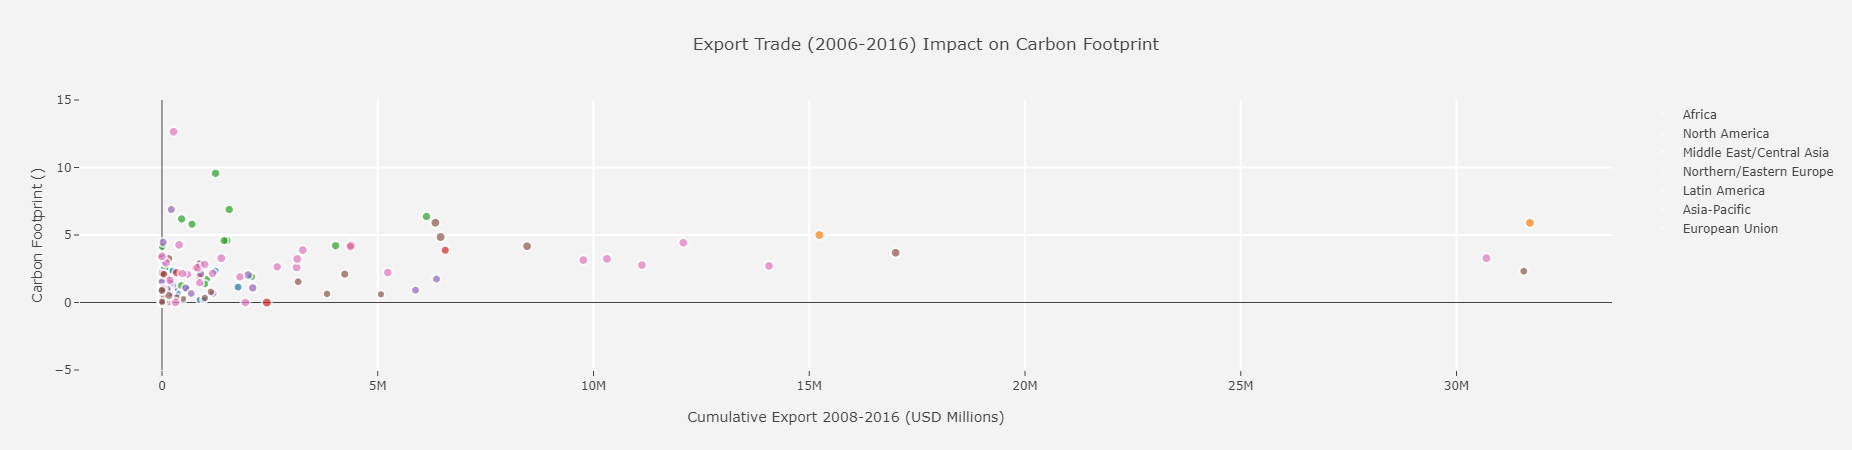

In [19]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import pandas as pd
import math

df_2007 = MERGE2
df_2007['HDI'].fillna(0, inplace=True)
df_2007['ExpTrade_Mill'].fillna(0, inplace=True)
df_2007['Total Ecological Footprint'].fillna(0, inplace=True)
df_2007['GDP per Capita'].fillna(0, inplace=True)
df_2007["Population (millions)"].fillna(0, inplace=True)
df_2007["Carbon Footprint"].fillna(0, inplace=True)

#slope = 2.666051223553066e-05
hover_text = []
bubble_size = []

for index, row in df_2007.iterrows(): # each row of the df_2007 will be referenced
    hover_text.append(('Country: {country}<br>'+
                      'Total Ecological Footprint: {EcoFoot}<br>'+
                      'GDP per capita: {gdp}<br>'+
                      'Population (Millions): {pop}<br>'+
                      'Year: {year}').format(country=row['Country'],
                                            EcoFoot=row['Total Ecological Footprint'],
                                            gdp=row['GDP per Capita'],
                                            pop=row["Population (millions)"],
                                            year='2016'))
    #bubble_size.append(math.sqrt(row["Population (millions)"]*slope))
    bubble_size.append(row["HDI"])

df_2007['text'] = hover_text
df_2007['size'] = bubble_size
sizeref = 2.*max(df_2007['size'])/(10**2)

trace0 = go.Scatter(
    x=df_2007['ExpTrade_Mill'][df_2007['Region'] == 'Africa'],
    y=df_2007["Carbon Footprint"][df_2007['Region'] == 'Africa'],
    mode='markers',
    name='Africa',
    text=df_2007['text'][df_2007['Region'] == 'Africa'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'Africa'],
        line=dict(
            width=2
        ),
    )
)
trace1 = go.Scatter(
    x=df_2007['ExpTrade_Mill'][df_2007['Region'] == 'North America'],
    y=df_2007["Carbon Footprint"][df_2007['Region'] == 'North America'],
    mode='markers',
    name='North America',
    text=df_2007['text'][df_2007['Region'] == 'North America'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'North America'],
        line=dict(
            width=2
        ),
    )
)
trace2 = go.Scatter(
    x=df_2007['ExpTrade_Mill'][df_2007['Region'] == 'Middle East/Central Asia'],
    y=df_2007["Carbon Footprint"][df_2007['Region'] == 'Middle East/Central Asia'],
    mode='markers',
    name='Middle East/Central Asia',
    text=df_2007['text'][df_2007['Region'] == 'Middle East/Central Asia'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'Middle East/Central Asia'],
        line=dict(
            width=2
        ),
    )
)
trace3 = go.Scatter(
    x=df_2007['ExpTrade_Mill'][df_2007['Region'] == 'Northern/Eastern Europe'],
    y=df_2007["Carbon Footprint"][df_2007['Region'] == 'Northern/Eastern Europe'],
    mode='markers',
    name='Northern/Eastern Europe',
    text=df_2007['text'][df_2007['Region'] == 'Northern/Eastern Europe'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'Northern/Eastern Europe'],
        line=dict(
            width=2
        ),
    )
)
trace4 = go.Scatter(
    x=df_2007['ExpTrade_Mill'][df_2007['Region'] == 'Latin America'],
    y=df_2007["Carbon Footprint"][df_2007['Region'] == 'Latin America'],
    mode='markers',
    name='Latin America',
    text=df_2007['text'][df_2007['Region'] == 'Latin America'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'Latin America'],
        line=dict(
            width=2
        ),
    )
)

trace5 = go.Scatter(
    x=df_2007['ExpTrade_Mill'][df_2007['Region'] == 'Asia-Pacific'],
    y=df_2007["Carbon Footprint"][df_2007['Region'] == 'Asia-Pacific'],
    mode='markers',
    name='Asia-Pacific',
    text=df_2007['text'][df_2007['Region'] == 'Asia-Pacific'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'Asia-Pacific'],
        line=dict(
            width=2
        ),
    )
)

trace6 = go.Scatter(
    x=df_2007['ExpTrade_Mill'][df_2007['Region'] == 'European Union'],
    y=df_2007["Carbon Footprint"][df_2007['Region'] == 'European Union'],
    mode='markers',
    name='European Union',
    text=df_2007['text'][df_2007['Region'] == 'European Union'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'European Union'],
        line=dict(
            width=2
        ),
    )
)
                      
trace7 = go.Scatter(
    x=df_2007['ExpTrade_Mill'][df_2007['Region'] == 'nan'],
    y=df_2007["Carbon Footprint"][df_2007['Region'] == 'nan'],
    mode='markers',
    name='nan',
    text=df_2007['text'][df_2007['Region'] == 'nan'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'nan'],
        line=dict(
            width=2
        ),
    )
)
                      
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]
layout = go.Layout(
    title='Export Trade (2006-2016) Impact on Carbon Footprint',
    xaxis=dict(
        title='Cumulative Export 2008-2016 (USD Millions)',
        gridcolor='rgb(255, 255, 255)',
        #range=[0, 1],
        #type='log',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Carbon Footprint ()',
        gridcolor='rgb(255, 255, 255)',
        range=[-5, 15],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig) 

**Comment**
* There is an obvious postive relationship as Cumulative Export size increases, carbon footprint also increases, but variation also increases as export increases, suggesting there is a case of heteroscedacity. 

## Hypothesis 2: More Poverty a country has, the more carbon footprint 

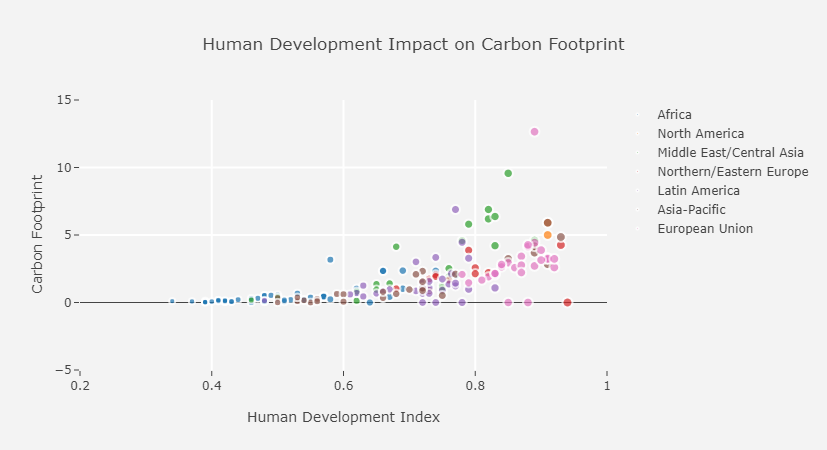

In [23]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import pandas as pd
import math

df_2007 = MERGE2
df_2007['HDI'].fillna(0, inplace=True)
df_2007['ExpTrade_Mill'].fillna(0, inplace=True)
df_2007['Total Ecological Footprint'].fillna(0, inplace=True)
df_2007['GDP per Capita'].fillna(0, inplace=True)
df_2007["Population (millions)"].fillna(0, inplace=True)
df_2007["Carbon Footprint"].fillna(0, inplace=True)

#slope = 2.666051223553066e-05
hover_text = []
bubble_size = []

for index, row in df_2007.iterrows(): # each row of the df_2007 will be referenced
    hover_text.append(('Country: {country}<br>'+
                      'Total Ecological Footprint: {EcoFoot}<br>'+
                      'GDP per capita: {gdp}<br>'+
                      'Population (Millions): {pop}<br>'+
                      'Year: {year}').format(country=row['Country'],
                                            EcoFoot=row['Total Ecological Footprint'],
                                            gdp=row['GDP per Capita'],
                                            pop=row["Population (millions)"],
                                            year='2016'))
    #bubble_size.append(math.sqrt(row["Population (millions)"]*slope))
    bubble_size.append(row["HDI"])

df_2007['text'] = hover_text
df_2007['size'] = bubble_size
sizeref = 2.*max(df_2007['size'])/(10**2)

trace0 = go.Scatter(
    x=df_2007['HDI'][df_2007['Region'] == 'Africa'],
    y=df_2007["Carbon Footprint"][df_2007['Region'] == 'Africa'],
    mode='markers',
    name='Africa',
    text=df_2007['text'][df_2007['Region'] == 'Africa'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'Africa'],
        line=dict(
            width=2
        ),
    )
)
trace1 = go.Scatter(
    x=df_2007['HDI'][df_2007['Region'] == 'North America'],
    y=df_2007["Carbon Footprint"][df_2007['Region'] == 'North America'],
    mode='markers',
    name='North America',
    text=df_2007['text'][df_2007['Region'] == 'North America'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'North America'],
        line=dict(
            width=2
        ),
    )
)
trace2 = go.Scatter(
    x=df_2007['HDI'][df_2007['Region'] == 'Middle East/Central Asia'],
    y=df_2007["Carbon Footprint"][df_2007['Region'] == 'Middle East/Central Asia'],
    mode='markers',
    name='Middle East/Central Asia',
    text=df_2007['text'][df_2007['Region'] == 'Middle East/Central Asia'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'Middle East/Central Asia'],
        line=dict(
            width=2
        ),
    )
)
trace3 = go.Scatter(
    x=df_2007['HDI'][df_2007['Region'] == 'Northern/Eastern Europe'],
    y=df_2007["Carbon Footprint"][df_2007['Region'] == 'Northern/Eastern Europe'],
    mode='markers',
    name='Northern/Eastern Europe',
    text=df_2007['text'][df_2007['Region'] == 'Northern/Eastern Europe'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'Northern/Eastern Europe'],
        line=dict(
            width=2
        ),
    )
)
trace4 = go.Scatter(
    x=df_2007['HDI'][df_2007['Region'] == 'Latin America'],
    y=df_2007["Carbon Footprint"][df_2007['Region'] == 'Latin America'],
    mode='markers',
    name='Latin America',
    text=df_2007['text'][df_2007['Region'] == 'Latin America'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'Latin America'],
        line=dict(
            width=2
        ),
    )
)

trace5 = go.Scatter(
    x=df_2007['HDI'][df_2007['Region'] == 'Asia-Pacific'],
    y=df_2007["Carbon Footprint"][df_2007['Region'] == 'Asia-Pacific'],
    mode='markers',
    name='Asia-Pacific',
    text=df_2007['text'][df_2007['Region'] == 'Asia-Pacific'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'Asia-Pacific'],
        line=dict(
            width=2
        ),
    )
)

trace6 = go.Scatter(
    x=df_2007['HDI'][df_2007['Region'] == 'European Union'],
    y=df_2007["Carbon Footprint"][df_2007['Region'] == 'European Union'],
    mode='markers',
    name='European Union',
    text=df_2007['text'][df_2007['Region'] == 'European Union'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'European Union'],
        line=dict(
            width=2
        ),
    )
)
                      
trace7 = go.Scatter(
    x=df_2007['HDI'][df_2007['Region'] == 'nan'],
    y=df_2007["Carbon Footprint"][df_2007['Region'] == 'nan'],
    mode='markers',
    name='nan',
    text=df_2007['text'][df_2007['Region'] == 'nan'],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        size=df_2007['size'][df_2007['Region'] == 'nan'],
        line=dict(
            width=2
        ),
    )
)
                      
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]
layout = go.Layout(
    title='Human Development Impact on Carbon Footprint',
    xaxis=dict(
        title='Human Development Index',
        gridcolor='rgb(255, 255, 255)',
        range=[0.2, 1],
        #type='log',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Carbon Footprint',
        gridcolor='rgb(255, 255, 255)',
        range=[-5, 15],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig) 

**Comment**
What was more interesting is the fact that after a country reaches HDI of 0.6 score, countries’ carbon footprint seems to be accelerated. In other words, one can infer that once a country reaches a certain standard of living (HDI = 0.6), it will accelerate its carbon emission output. At HDI = 0.6, carbon footprint has exponential growth; perhaps analyzing these countries can reveal kind of standards of living developing countries have.  Countries that have HDI close to 0.6 can be considered as “critical” countries. Once they adopt existing infrastructure, raw materials, technology, and supply chain to move out of poverty, subsequently they will follow the same pattern of development and pollution that the current first-world nations went through.  One can infer that export trading also increases as a market mechanism to increase standards of living by providing products that serves the next level of human development. 

**For the Policy Makers and Supply Producers**
How do we:
* Rethinking Manufacturing and Logistics for Developing Nations
* Renegotiate Political Trade Agreements and allow Developing Nations Take the Lead


## Work Cited & Soures
Websites:
* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5783954/
* http://web.uvic.ca/~kooten/Commentary/Poverty&ClimateChange.pdf

* George, C. and S. Yamaguchi (2018), “Assessing Implementation of Environmental Provisions in Regional Trade Agreements”, OECD Trade and Environment Working Papers, 2018/01, OECD Publishing, Paris. http://dx.doi.org/10.1787/91aacfea-en 
* Harun Onder(2012), “What does trade have to do with climate change?”, VOX CEPR Policy Portal. https://voxeu.org/article/what-does-trade-have-do-climate-change
* Karl Mathiesen(2018), “Trade war would harm the environment, warns UN green chief”, Climate Change News. http://www.climatechangenews.com/2018/06/28/trade-war-harm-environment-warns-un-green-chief/
Jonathan M. Harris (2002), “Trade and the environment”, GDAE Institute, Tufts University
* Van Asselt, H. (2017), “Climate change and trade policy interaction: Implications of regionalism”, OECD Trade and Environment Working Papers, 2017/03, OECD Publishing, Paris. http://dx.doi.org/10.1787/c1bb521e-en
* Dellink, R. et al. (2017), “International trade consequences of climate change”, OECD Trade and Environment Working Papers, 2017/01, OECD Publishing, Paris. http://dx.doi.org/10.1787/9f446180-en
* Kevin Gallagher (2001), “The Economics of Trade and the Environment: Redefining the Research Agenda”, GDAE Institute, Tufts University
* Glen P. Peters, Edgar G. Herwich(2008), “CO2 Embodied in International Trade with Implications for Global Climate Policy”
* LudivineTamiotti, Robert Teh, VesileKulaçoğlu, Anne Olhoff, Benjamin Simmons, Hussein Abaza (2009), “Trade and climate change”, WTO-UNEP Report.
* Duncan Brack(1998), “Trade and environment: conflict or compatibility?”, Earthscan and Royal Institute of International Affairs.
* Tussie, Diana (1999), “The Environment and International Trade”. National Political Economy Series. Ed Tim Shaw. 
